**Import Libraries**

In [ ]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [ ]:
#import dataset

df = pd.read_csv(r"/content/bank.csv", delimiter=';')

In [ ]:
df.rename(columns={'y':'deposit'}, inplace=True)


In [ ]:
#display first 5 rows of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Data Exploration**


In [ ]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 4521 rows.


In [ ]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

**Categorical columns exploration**

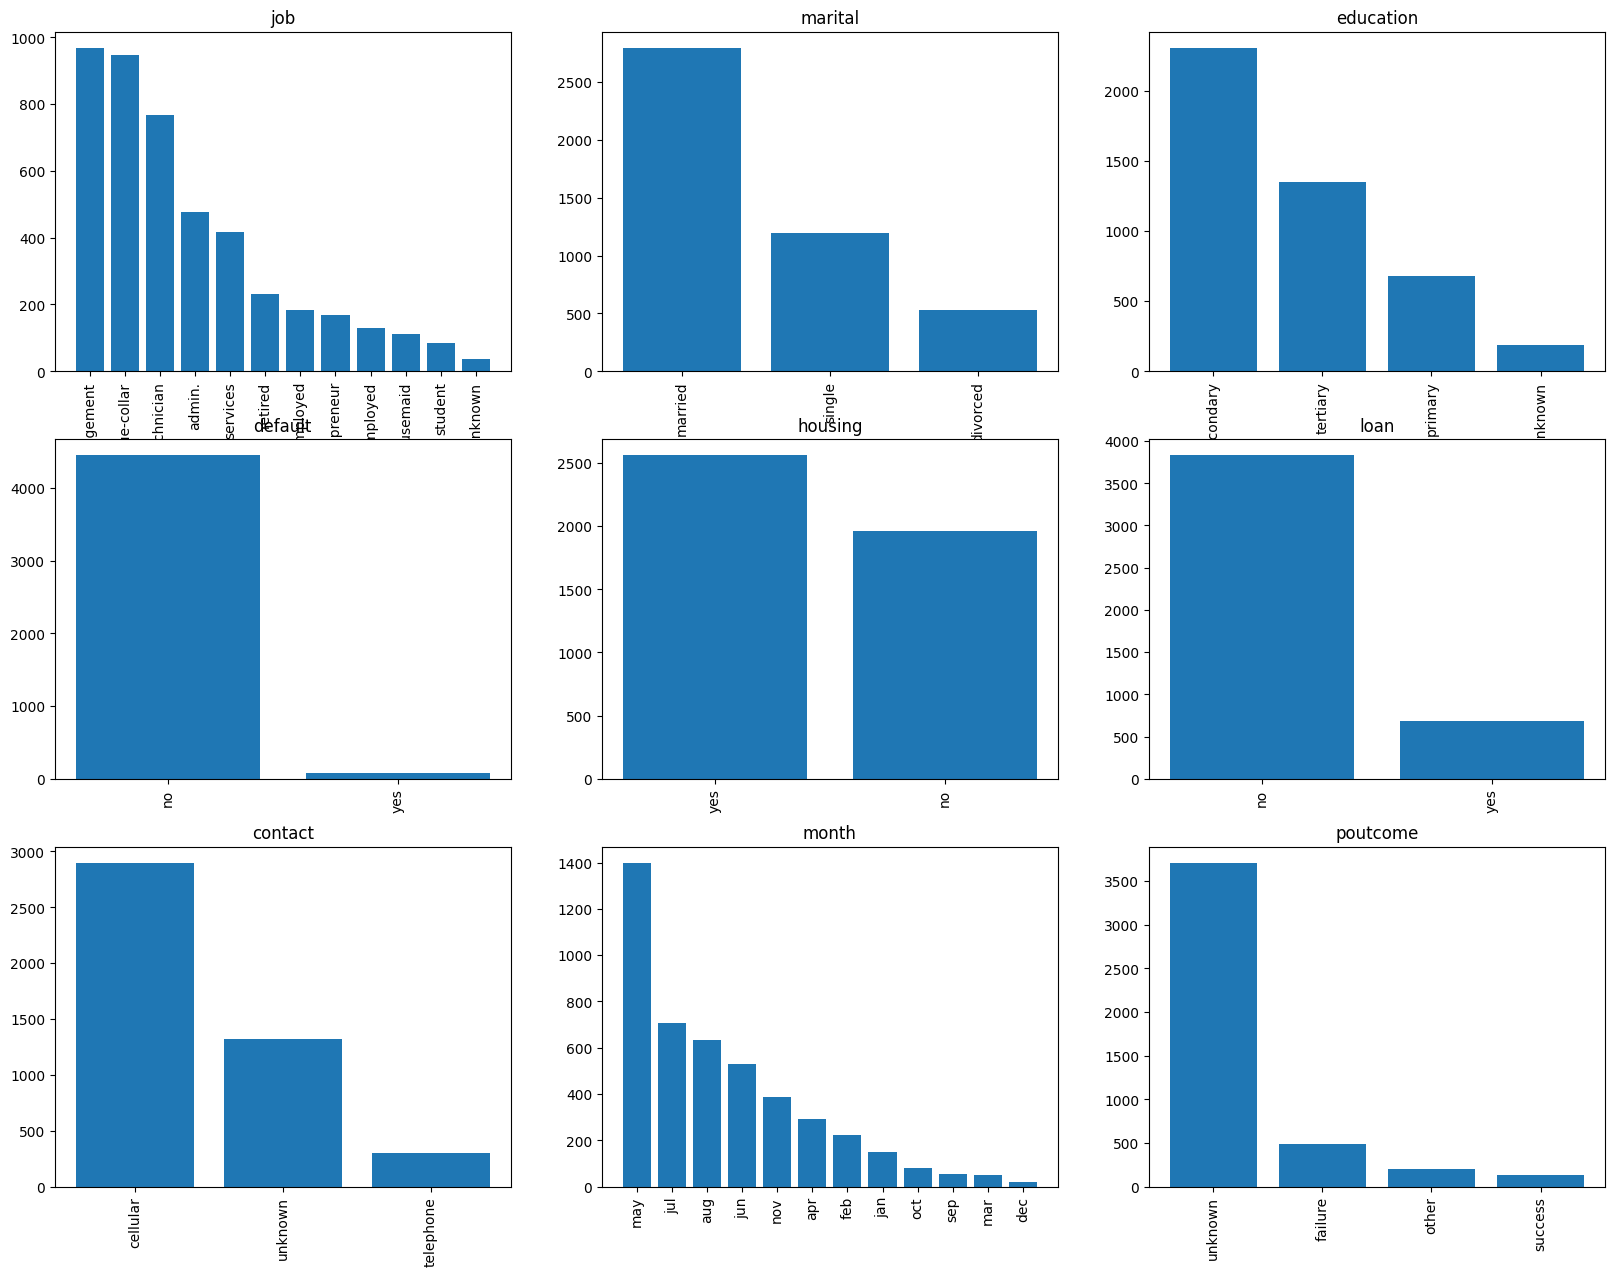

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

**Numerical columns exploration**

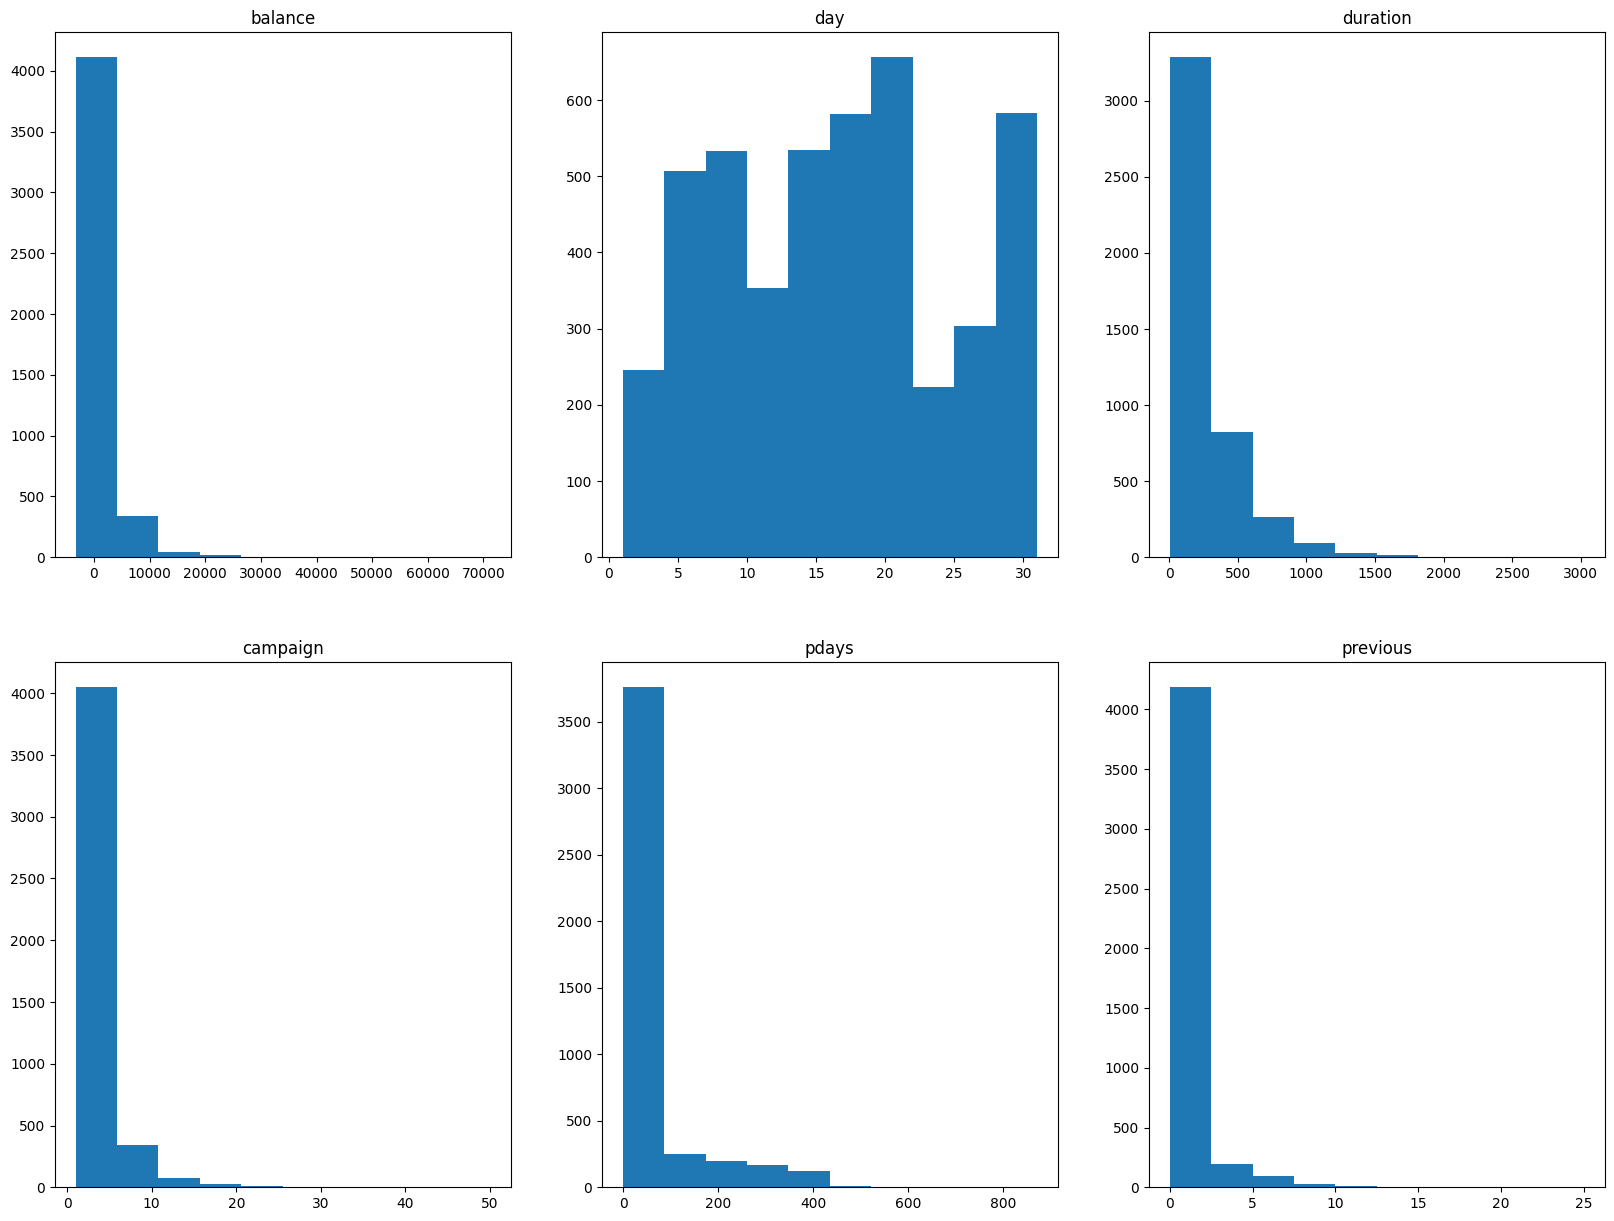

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:

    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(df[num_column])

    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

plt.show()

In [ ]:
df[['pdays', 'campaign', 'previous','balance']].describe()

,pdays,campaign,previous,balance
count,4521.000000,4521.000000,4521.000000,4521.000000
mean,39.766645,2.793630,0.542579,1422.657819
std,100.121124,3.109807,1.693562,3009.638142
min,-1.000000,1.000000,0.000000,-3313.000000
25%,-1.000000,1.000000,0.000000,69.000000
50%,-1.000000,2.000000,0.000000,444.000000
75%,-1.000000,3.000000,0.000000,1480.000000
max,871.000000,50.000000,25.000000,71188.000000


In [ ]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.57509400575094

In [ ]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.04423800044238001

In [ ]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.0

In [ ]:
len (df[df['balance'] > 34] ) / len(df) * 100

78.7657597876576

**Analysis of the response column**

<Axes: title={'center': 'Deposit value counts'}, xlabel='deposit'>

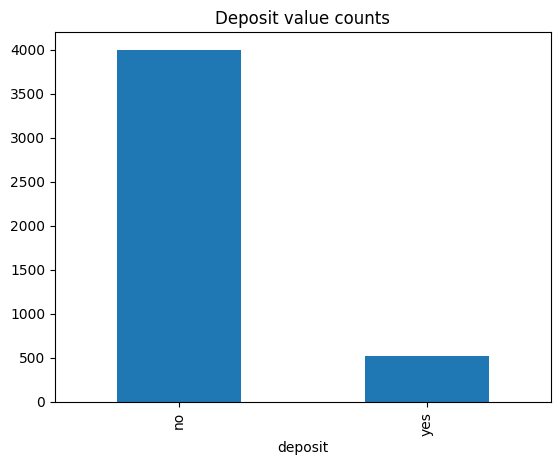

In [ ]:
value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

<Axes: title={'center': 'Job and deposit'}, xlabel='job'>

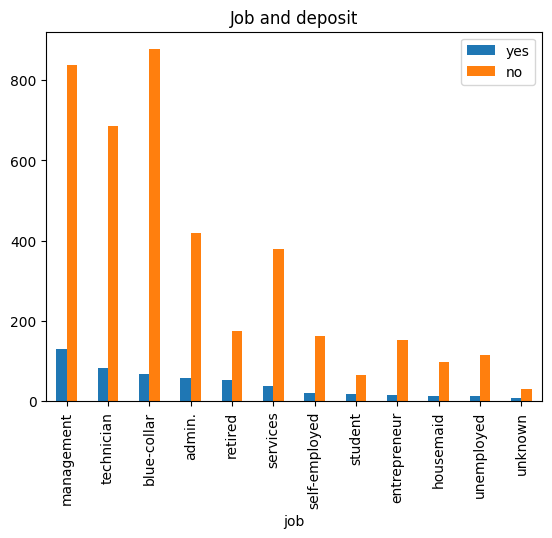

In [ ]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<Axes: title={'center': 'Marital status and deposit'}, xlabel='marital'>

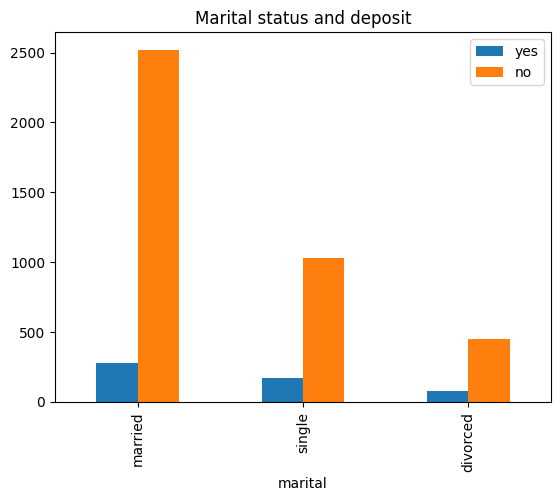

In [ ]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<Axes: title={'center': 'Education and deposit'}, xlabel='education'>

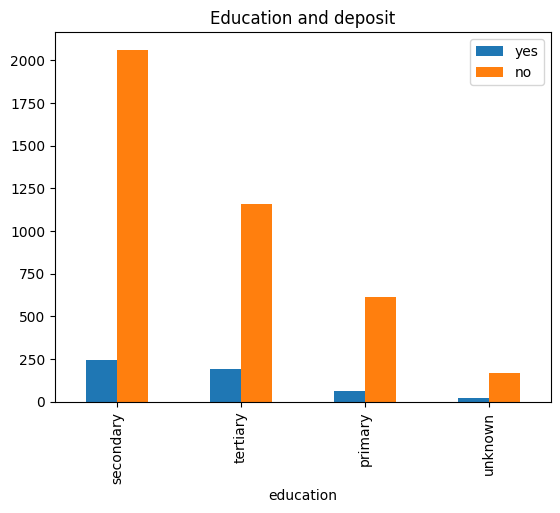

In [ ]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<Axes: title={'center': 'Type of contact and deposit'}, xlabel='contact'>

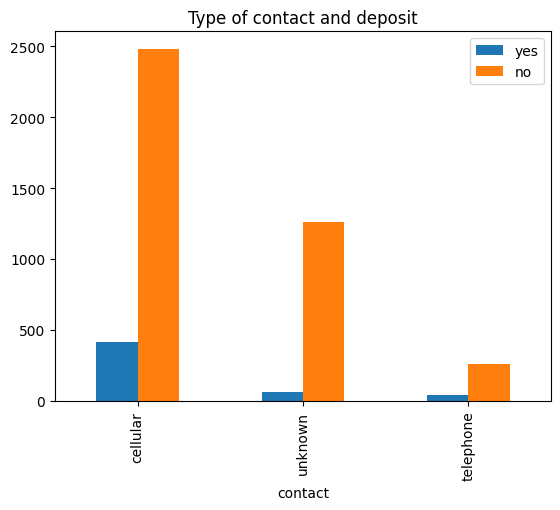

In [ ]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [ ]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,521.000000,4000.000000
mean,1571.955854,1403.211750
std,2444.398956,3075.349313
min,-1206.000000,-3313.000000
25%,171.000000,61.000000
50%,710.000000,419.500000
75%,2160.000000,1407.000000
max,26965.000000,71188.000000


<Axes: title={'center': 'Balance and deposit statistics'}>

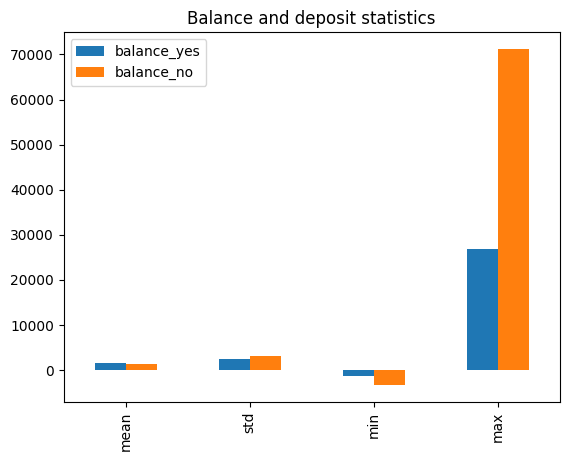

In [ ]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [ ]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,521.000000,4000.000000
mean,42.491363,40.998000
std,13.115772,10.188398
min,19.000000,19.000000
25%,32.000000,33.000000
50%,40.000000,39.000000
75%,50.000000,48.000000
max,87.000000,86.000000


<Axes: title={'center': 'Age and deposit statistics'}>

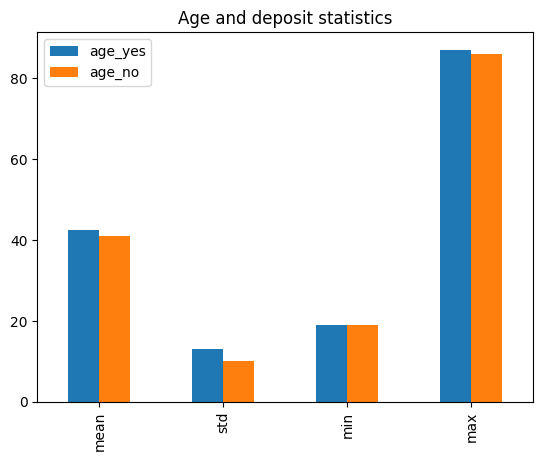

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [ ]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,521.000000,4000.000000
mean,2.266795,2.862250
std,2.092071,3.212609
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,24.000000,50.000000


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

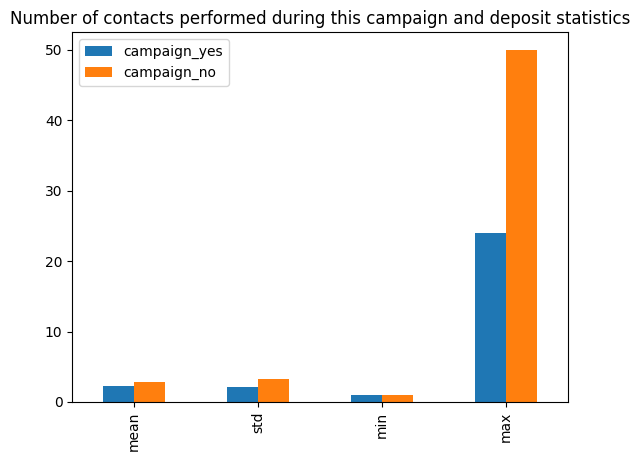

In [ ]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [ ]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,521.000000,4000.000000
mean,1.090211,0.471250
std,2.055368,1.627371
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,14.000000,25.000000


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

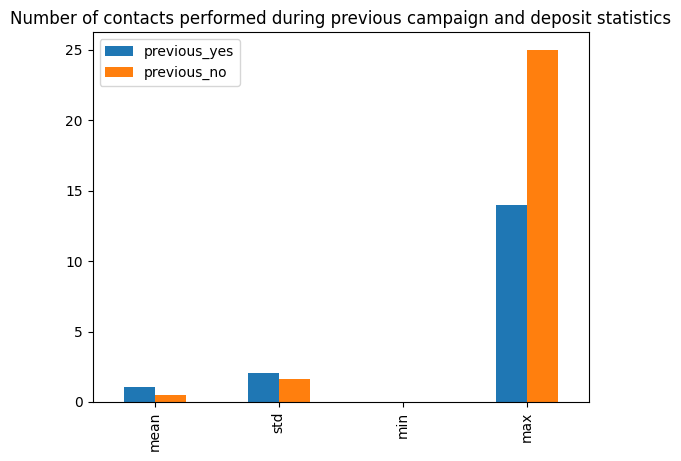

In [ ]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

**Data Cleaning**

In [ ]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset

    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''

    cleaned_df = df.copy()

    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)

    cleaned_df = cleaned_df.drop(columns = bool_columns)

    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)

    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])

    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)

    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])

    return cleaned_df

In [ ]:
#clean the dataset
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,30,1787,19,79,0,0,0,0,False,False,...,False,False,False,True,False,False,False,True,1.0,0
1,33,4789,11,220,0,1,1,0,False,False,...,False,True,False,False,False,False,False,False,1.0,4
2,35,1350,16,185,0,1,0,0,False,False,...,False,False,False,False,False,False,False,False,1.0,1
3,30,1476,3,199,0,1,1,0,False,False,...,False,False,False,False,False,False,False,True,4.0,0
4,59,0,5,226,0,1,0,0,True,False,...,False,True,False,False,False,False,False,True,1.0,0


**Machine Learning for prediction of campaign outcome**

In [ ]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [ ]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [ ]:
pip install xgboost

In [ ]:
import xgboost

#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
xgb.fit(X_train, y_train.squeeze().values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('XGB accuracy score ofr train : %.3f and for test: %.3f' % (accuracy_score(y_train, y_train_preds),
                                                                 accuracy_score(y_test, y_test_preds)))

XGB accuracy score ofr train : 0.977 and for test: 0.895


**Get feature importance from the trained model**

In [ ]:
headers = ['name', 'score']
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1]*-1)
xgb_feature_importances_ = pd.DataFrame(values, columns=headers)
xgb_feature_importances_

,name,score
0,poutcome_success,0.132046
1,duration,0.050272
2,month_mar,0.042269
3,month_oct,0.041893
4,contact_unknown,0.040970
5,month_jun,0.034374
6,poutcome_unknown,0.033544
7,job_student,0.033034
8,education_unknown,0.028208
9,month_jan,0.027862


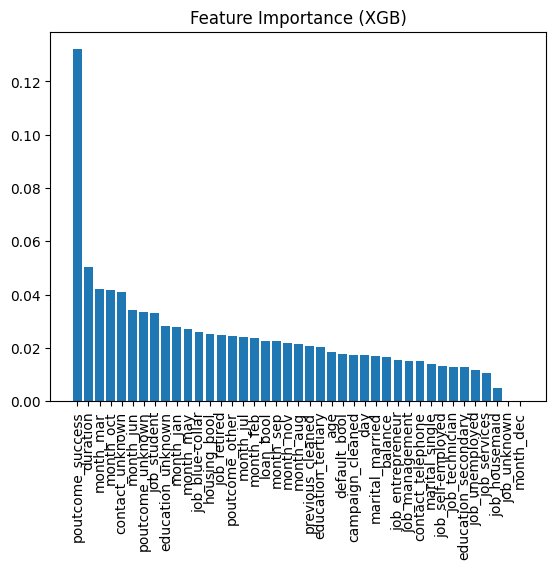

In [ ]:
x_pos = np.arange(0, len(xgb_feature_importances_))
plt.bar(x_pos, xgb_feature_importances_['score'])
plt.xticks(x_pos, xgb_feature_importances_['name'])
plt.xticks(rotation=90)
plt.title('Feature Importance (XGB)')

plt.show()